In [10]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from src.dnn import *
from tqdm.notebook import tqdm
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## QNN

In [13]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = Layer(n_inputs=1, n_outputs=2, ansatz=Ansatz(), reps=2, backend=backend, shots=2000)
layer2 = Layer(n_inputs=2, n_outputs=1, ansatz=Ansatz(), reps=2, backend=backend, shots=2000)
layers = [layer1, layer2]

optimizer = GD(lr=0.5)
network = QNN(layers, optimizer)

<IPython.core.display.Javascript object>


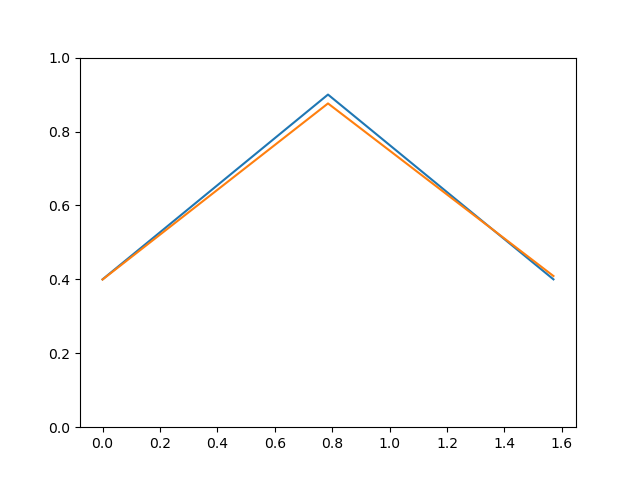

In [ ]:
x = np.linspace(0, np.pi/2, 3).reshape(-1,1)
y = 0.5*np.sin(2*x) + 0.4


fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


for i in tqdm(range(100)):
    network.backward(x, y)

    y_pred = []
    for x_ in x:
        network(x_)
        y_pred.append(network.a[-1])
    
    network.step()
    
    ax.clear()
    ax.plot(x, y)
    ax.plot(x, y_pred)
    ax.set_ylim([0, 1])
    fig.canvas.draw()